### Analisi di correlazione spazio-temporale 

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import datetime
import geopandas as gpd
import folium
import time
import my_code
warnings.filterwarnings('ignore')

import seaborn as sns

In [22]:
data = pd.read_csv('/Users/alket/desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)

#### Aggregazione per numero cella e data

In [23]:
agg_by_cell = data.groupby(by = ['cell_num'])

In [24]:
count = 0
for i, k in agg_by_cell: 
    print(i, k)
    count +=1
    if count > 0 : break

486-1252                date  cell_num  nr_people  hours  minutes
0        2017-04-16  486-1252       36.0    0.0      0.0
221      2017-04-16  486-1252       36.0    0.0     15.0
442      2017-04-16  486-1252       34.0    0.0     30.0
663      2017-04-16  486-1252       33.0    0.0     45.0
884      2017-04-16  486-1252       32.0    1.0      0.0
...             ...       ...        ...    ...      ...
2608463  2017-08-16  486-1252       41.0   22.0     45.0
2608684  2017-08-16  486-1252       40.0   23.0      0.0
2608905  2017-08-16  486-1252       39.0   23.0     15.0
2609126  2017-08-16  486-1252       40.0   23.0     30.0
2609347  2017-08-16  486-1252       40.0   23.0     45.0

[11808 rows x 5 columns]


In [25]:
X = agg_by_cell.get_group('490-1264')['nr_people'].tolist()
Y = agg_by_cell.get_group('490-1263')['nr_people'].tolist()
Z = agg_by_cell.get_group('490-1262')['nr_people'].tolist()
K = agg_by_cell.get_group('490-1261')['nr_people'].tolist()

X2 = agg_by_cell.get_group('495-1266')['nr_people'].tolist()
Y2 = agg_by_cell.get_group('495-1267')['nr_people'].tolist()
Z2 = agg_by_cell.get_group('496-1255')['nr_people'].tolist()
K2 = agg_by_cell.get_group('496-1256')['nr_people'].tolist()

print(X[0:10])

[28.0, 28.0, 28.0, 27.0, 27.0, 26.0, 26.0, 25.0, 25.0, 25.0]


In [26]:
data4corr = pd.DataFrame(columns = ['490-1264', '490-1263', '490-1262', '490-1261', 
                                    '495-1266', '495-1267',
                                   '496-1255', '496-1256'])

data4corr['490-1264'] = X
data4corr['490-1263'] = Y
data4corr['490-1262'] = Z
data4corr['490-1261'] = K


data4corr['495-1266'] = X2
data4corr['495-1267'] = Y2
data4corr['496-1255'] = Z2
data4corr['496-1256'] = K2

In [27]:
data4corr

,490-1264,490-1263,490-1262,490-1261,495-1266,495-1267,496-1255,496-1256
0,28.0,42.0,53.0,58.0,326.0,330.0,357.0,315.0
1,28.0,42.0,54.0,58.0,330.0,335.0,357.0,311.0
2,28.0,41.0,52.0,56.0,321.0,333.0,358.0,312.0
3,27.0,40.0,50.0,55.0,320.0,331.0,359.0,310.0
4,27.0,39.0,49.0,53.0,318.0,330.0,361.0,314.0
...,...,...,...,...,...,...,...,...
11803,29.0,32.0,43.0,46.0,279.0,297.0,332.0,308.0
11804,29.0,31.0,42.0,45.0,280.0,302.0,327.0,304.0
11805,28.0,30.0,41.0,45.0,275.0,298.0,329.0,305.0
11806,27.0,30.0,40.0,44.0,274.0,291.0,332.0,311.0


In [44]:
x_64 = data4corr['490-1264'].pct_change()
x_56 = data4corr['496-1256'].pct_change()

x_64 = np.array(x_64)[1:]
x_56 = np.array(x_56)[1:]

from scipy.stats.stats import pearsonr   

print(pearsonr(x_64,x_56))

X = np.array(X)
K2 = np.array(K2)

print(pearsonr(X, K2))
             

(0.1597529146480044, 2.458454085314719e-68)
(0.2046108304148171, 8.210480408566942e-112)


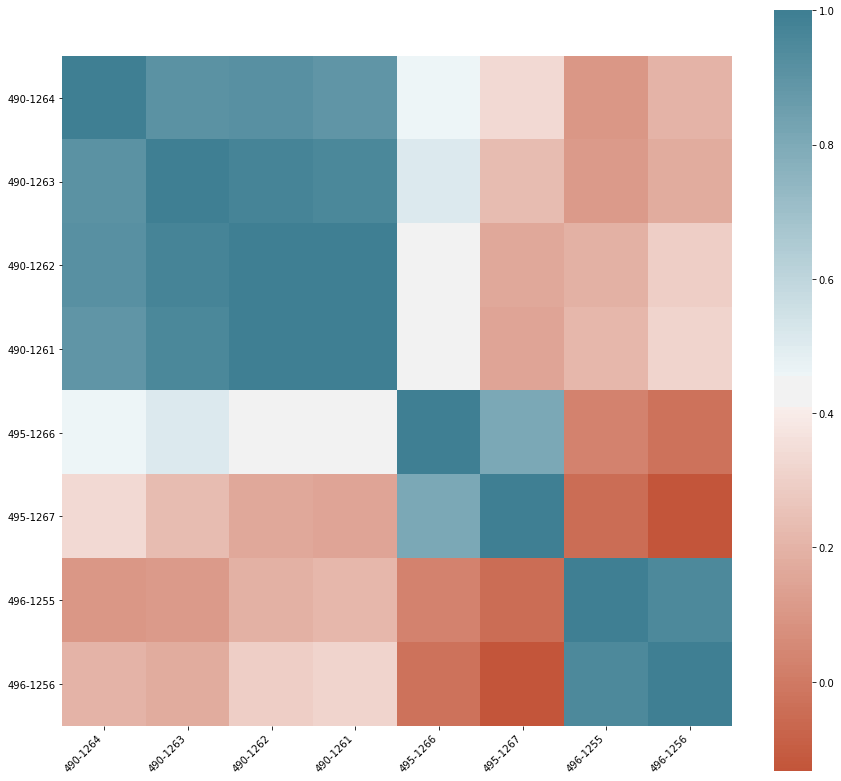

In [7]:
fig, ax = plt.subplots(figsize=(15,14)) 
corr = data4corr.corr()
ax = sns.heatmap(
    corr, 
    #vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

In [8]:
type(data)

pandas.core.frame.DataFrame

### Heatmap a parire dalla matrice di correlazione - per tutto il periodo

In [28]:
agg_by_cell_day = data.groupby(by = ['date','cell_num'])

In [29]:
count = 0
dict2data1 = {}
dict2data2 = {}
for i, k in agg_by_cell_day:
    count += 1 
    dict2data1[i[1]] = k['nr_people'].tolist()
    if count % 13 == 0:
        dict2data2[count] = dict2data1 
        dict2data1 = {}   

### Considero le celle che hanno una forte correlazione - visualizzo l'andamento

In [30]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 221 entries, (2017-04-16, 486-1252) to (2017-04-16, 498-1268)
Columns: 221 entries, (2017-04-16, 486-1252) to (2017-04-16, 498-1268)
dtypes: float64(221)
memory usage: 384.0+ KB


In [31]:
corr_high = corr.iloc[0:14, 0:14]
corr_high.head(4)

2017-04-16                                          \
                      486-1252  486-1253  486-1254  486-1255  486-1256   
2017-04-16 486-1252   1.000000  0.997564  0.995372  0.993650  0.985998   
           486-1253   0.997564  1.000000  0.998364  0.997396  0.992389   
           486-1254   0.995372  0.998364  1.000000  0.998720  0.995627   
           486-1255   0.993650  0.997396  0.998720  1.000000  0.996644   

                                                                       \
                     486-1257  486-1258  486-1259  486-1260  486-1261   
2017-04-16 486-1252  0.985351  0.960781  0.932823  0.932873  0.930727   
           486-1253  0.989019  0.970410  0.946520  0.946504  0.944571   
           486-1254  0.992524  0.976562  0.953761  0.953854  0.952670   
           486-1255  0.992543  0.979355  0.958427  0.958594  0.957443   

                                                             
                     486-1262  486-1263  486-1264  486-1265  
2017-04-16 486-1252  0.927455  0.921453  0.948399  0.942153  
           486-1253  0.941785  0.936871  0.959115  0.934318  
           486-1254  0.949579  0.945386  0.964404  0.935006  
           486-1255  0.954898  0.951047  0.968325  0.933117

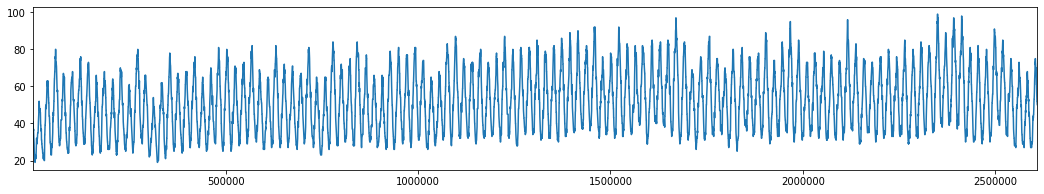

<function matplotlib.pyplot.show(*args, **kw)>

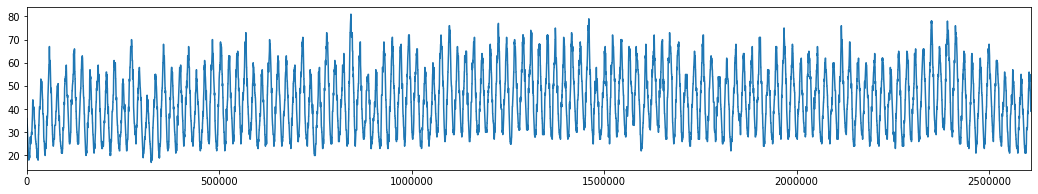

In [14]:
%matplotlib inline
plt.figure(figsize = (18, 3))
X = agg_by_cell.get_group('486-1255')['nr_people']
Y = agg_by_cell.get_group('486-1252')['nr_people']
X.plot()
plt.show()
plt.figure(figsize = (18, 3))
Y.plot()
plt.show

### Celle dalla correlazione debole - visualizzo andamento 

In [15]:
corr_low = corr.iloc[211:221, 0:13]
corr_low.head(4)

,498-1256,498-1257,498-1258,498-1259,498-1260,498-1261,498-1262,498-1263,498-1264,498-1265,498-1266,498-1267,498-1268


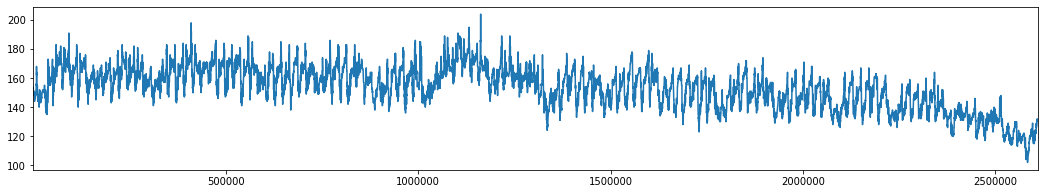

<function matplotlib.pyplot.show(*args, **kw)>

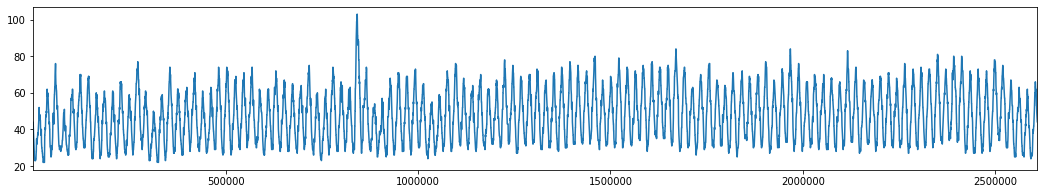

In [16]:
plt.figure(figsize = (18, 3))
X = agg_by_cell.get_group('498-1259')['nr_people']
Y = agg_by_cell.get_group('486-1257')['nr_people']
X.plot()
plt.show()
plt.figure(figsize = (18, 3))
Y.plot()
plt.show

### Heatmap di dati (celle) con aggregazione giornaliera 

In [17]:
agg_by_cell_day = data.groupby(by = ['date','cell_num'])

In [18]:
dict2data_day = {}
count = 0
for i,k in agg_by_cell_day:
    count +=1
    if count >221: break
    dict2data_day[i] = k['nr_people'].tolist()

In [19]:
data4_daily_heatmap = pd.DataFrame.from_dict(dict2data_day)

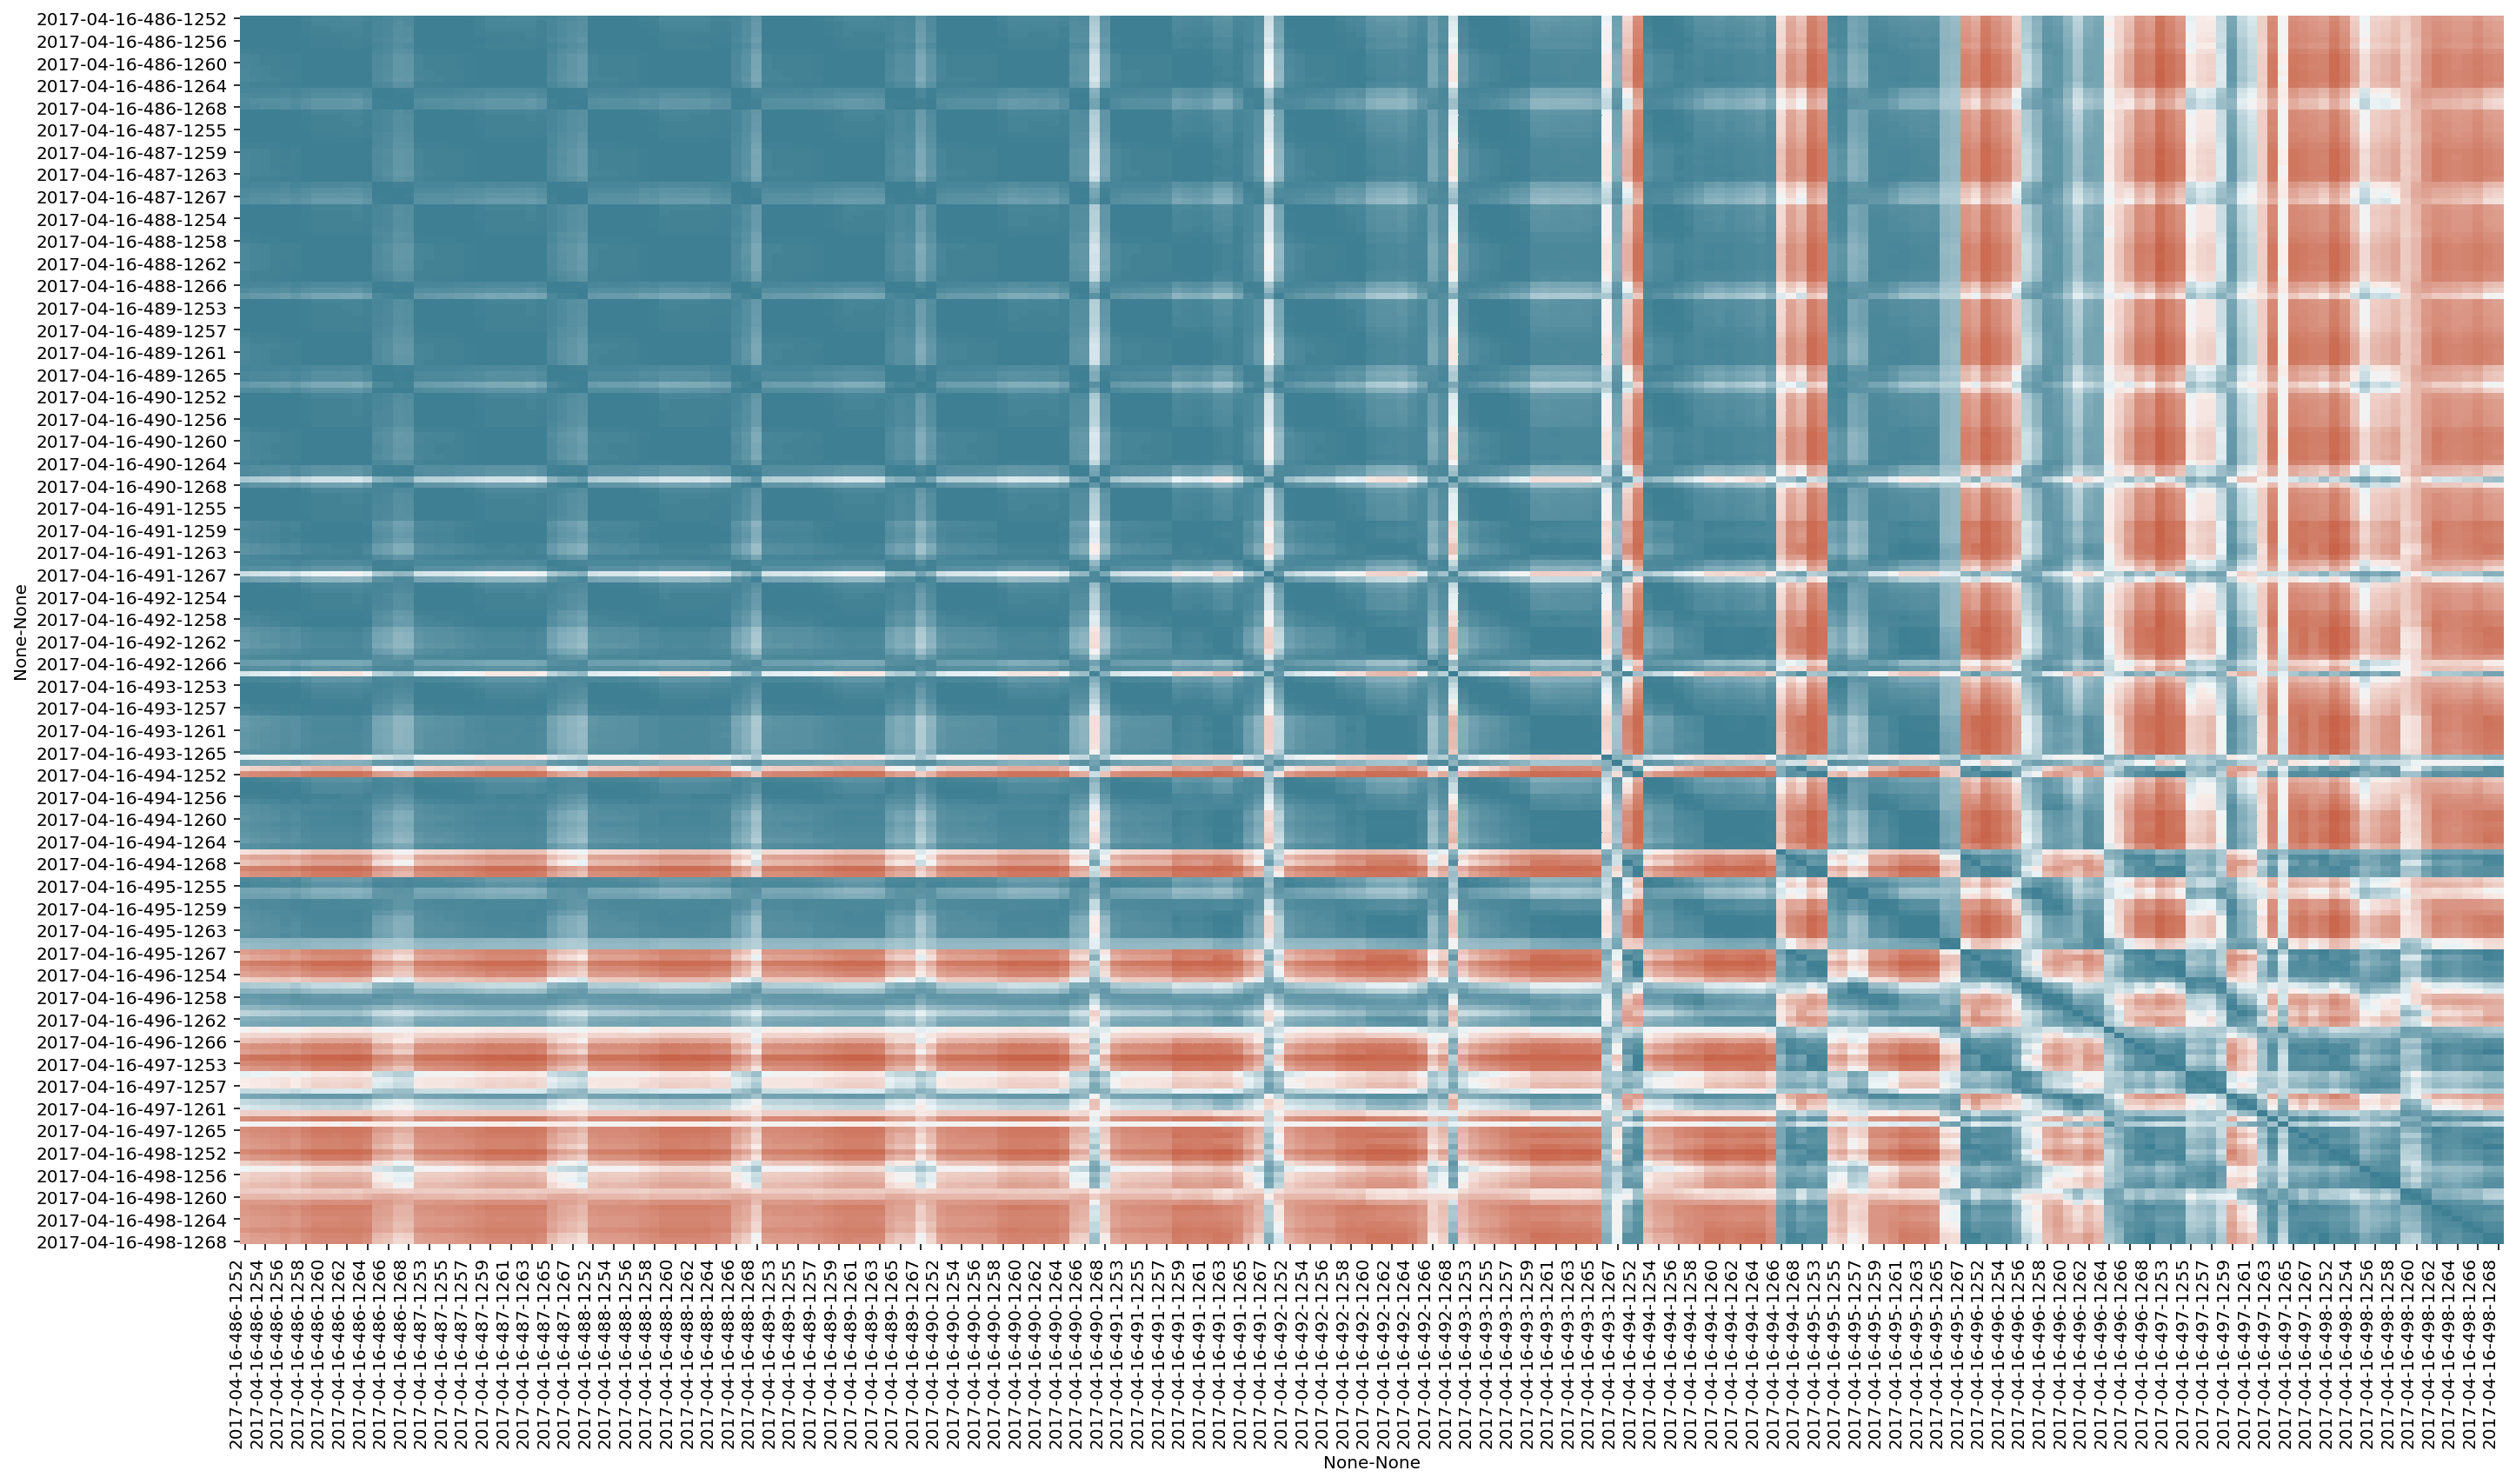

In [20]:
%matplotlib qt 
fig, ax = plt.subplots(figsize=(30,30)) 
corr = data4_daily_heatmap.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    cbar=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);